In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# load ylov8 object detection model from ultralytics
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="9JqwW7ycmwhuRCaBCkkP")

project = rf.workspace("tasarimproject").project("car-space-find")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.79, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Car-Space-Find-2 in yolov8:: 100%|██████████| 3052/3052 [00:00<00:00, 3364.74it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Car-Space-Find-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

In [ ]:
from IPython.display import display, Image

/content


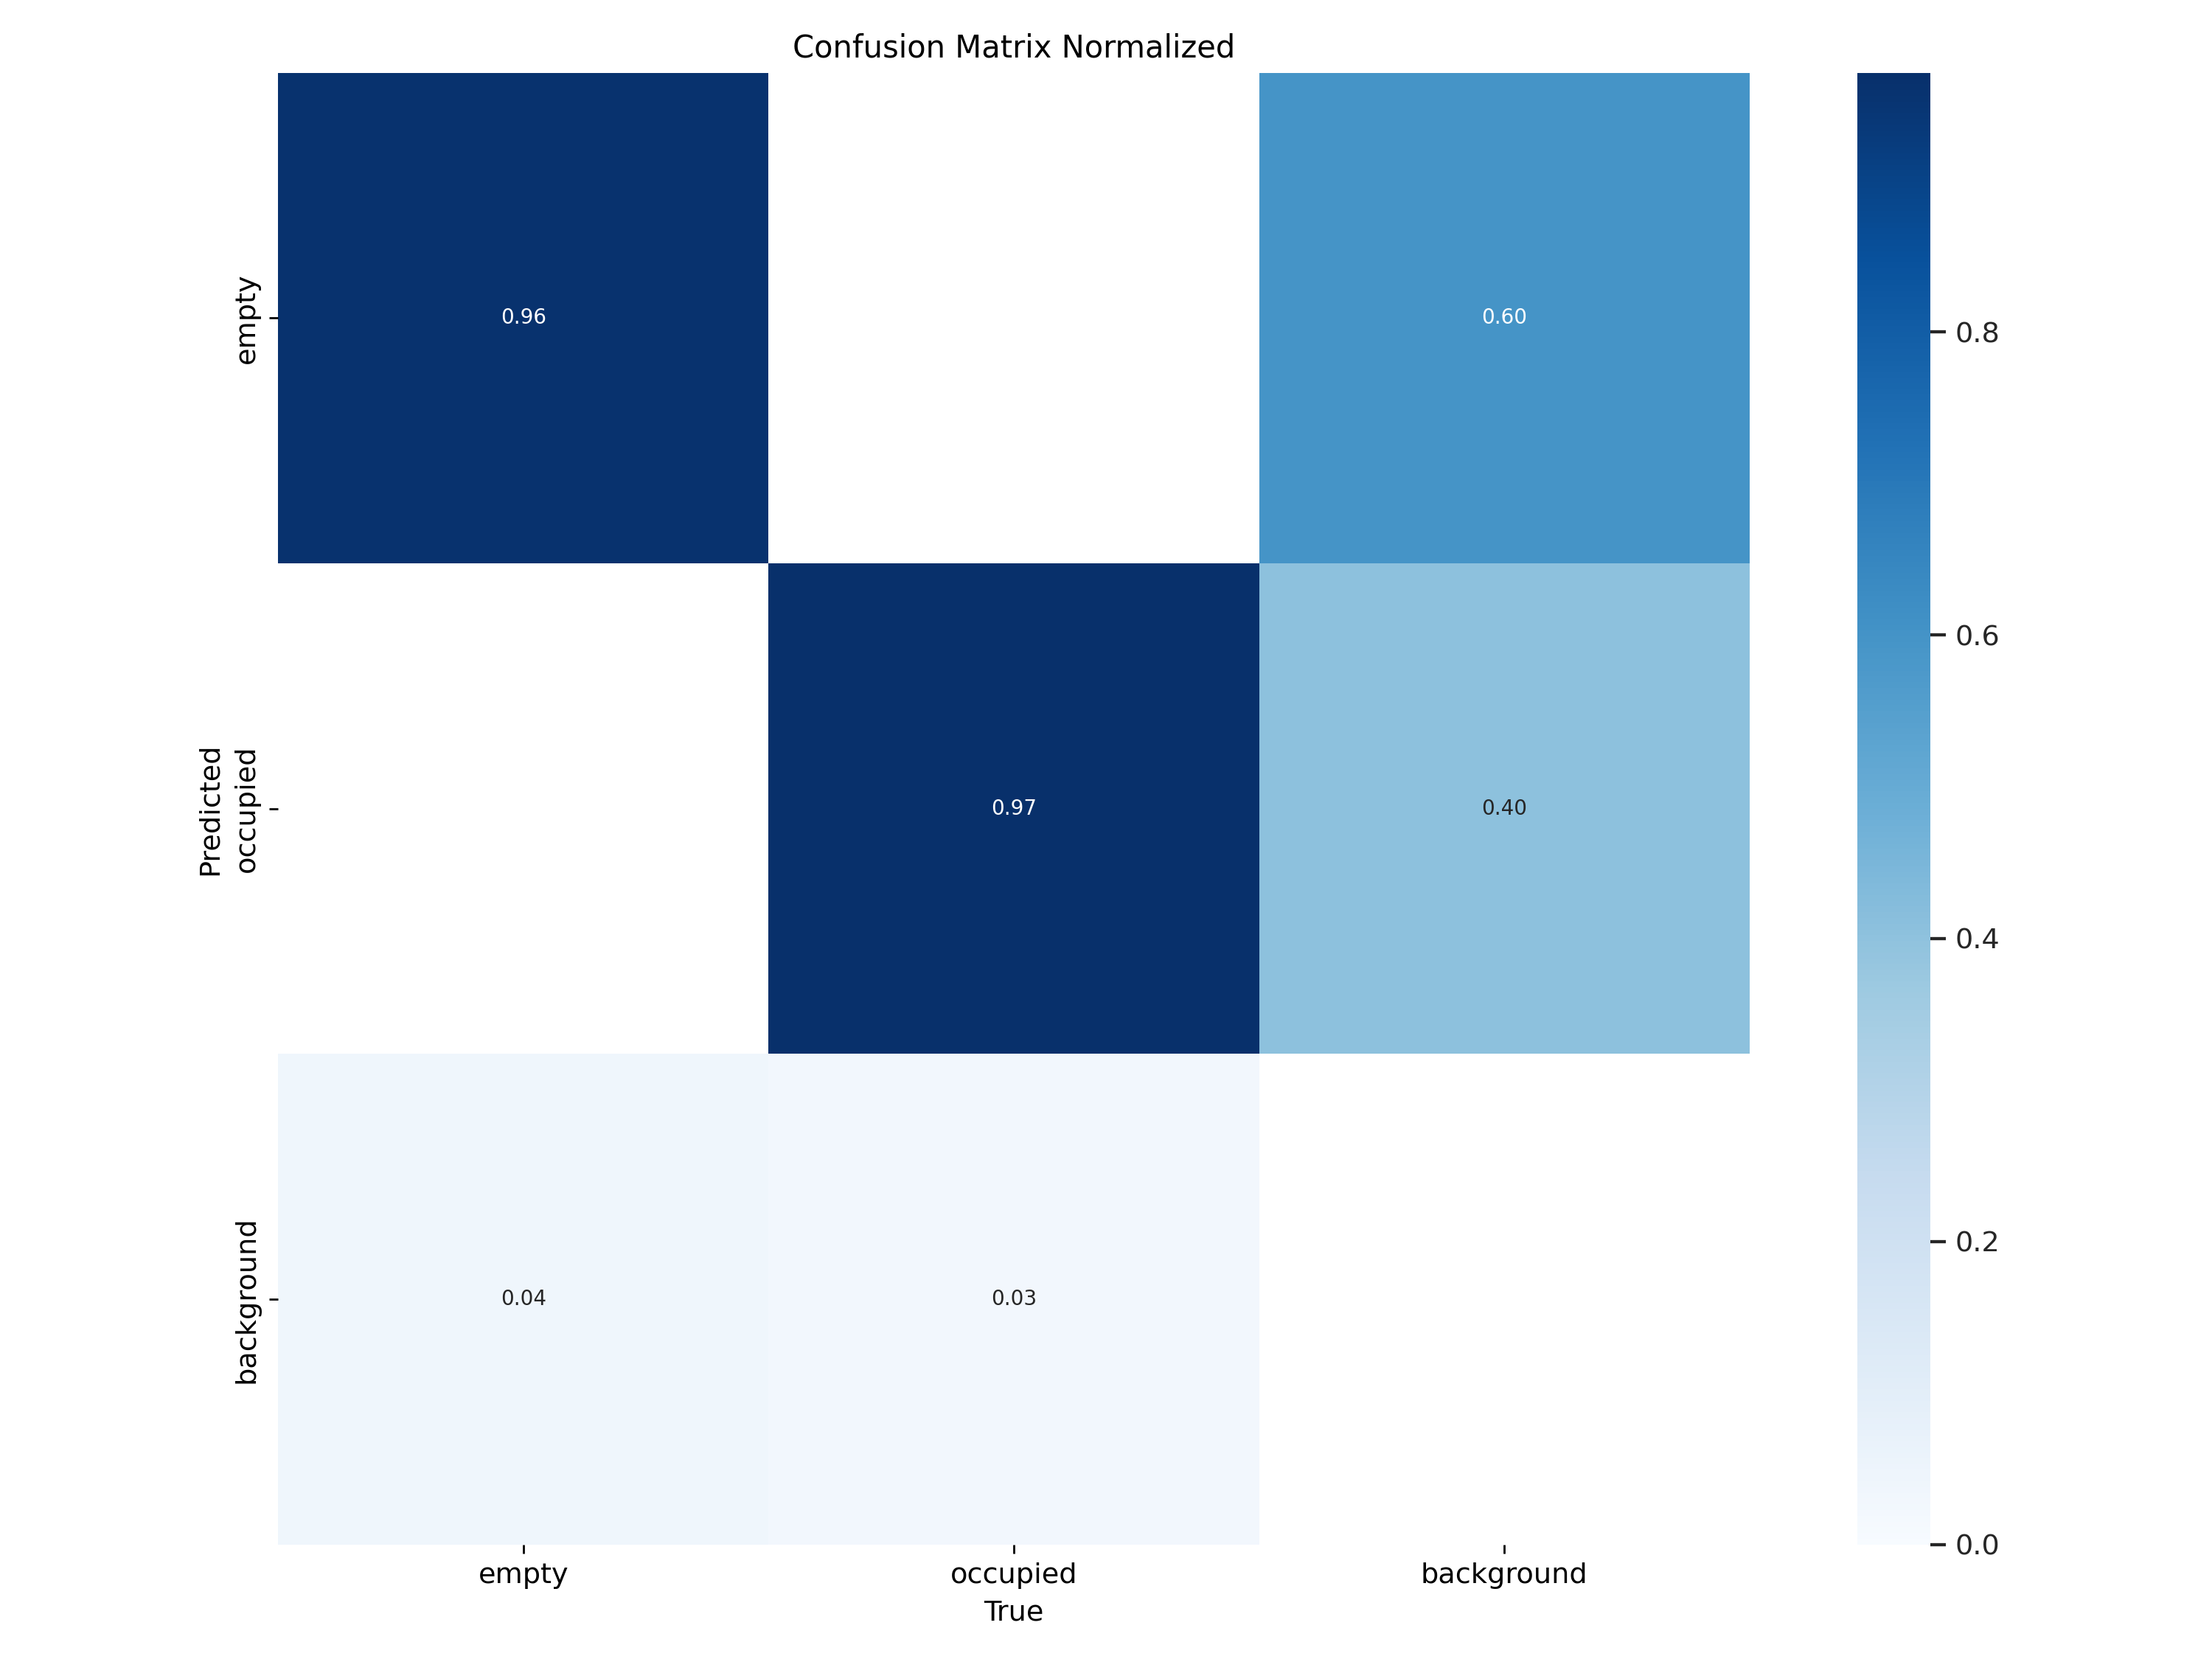

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png', width=600)

/content


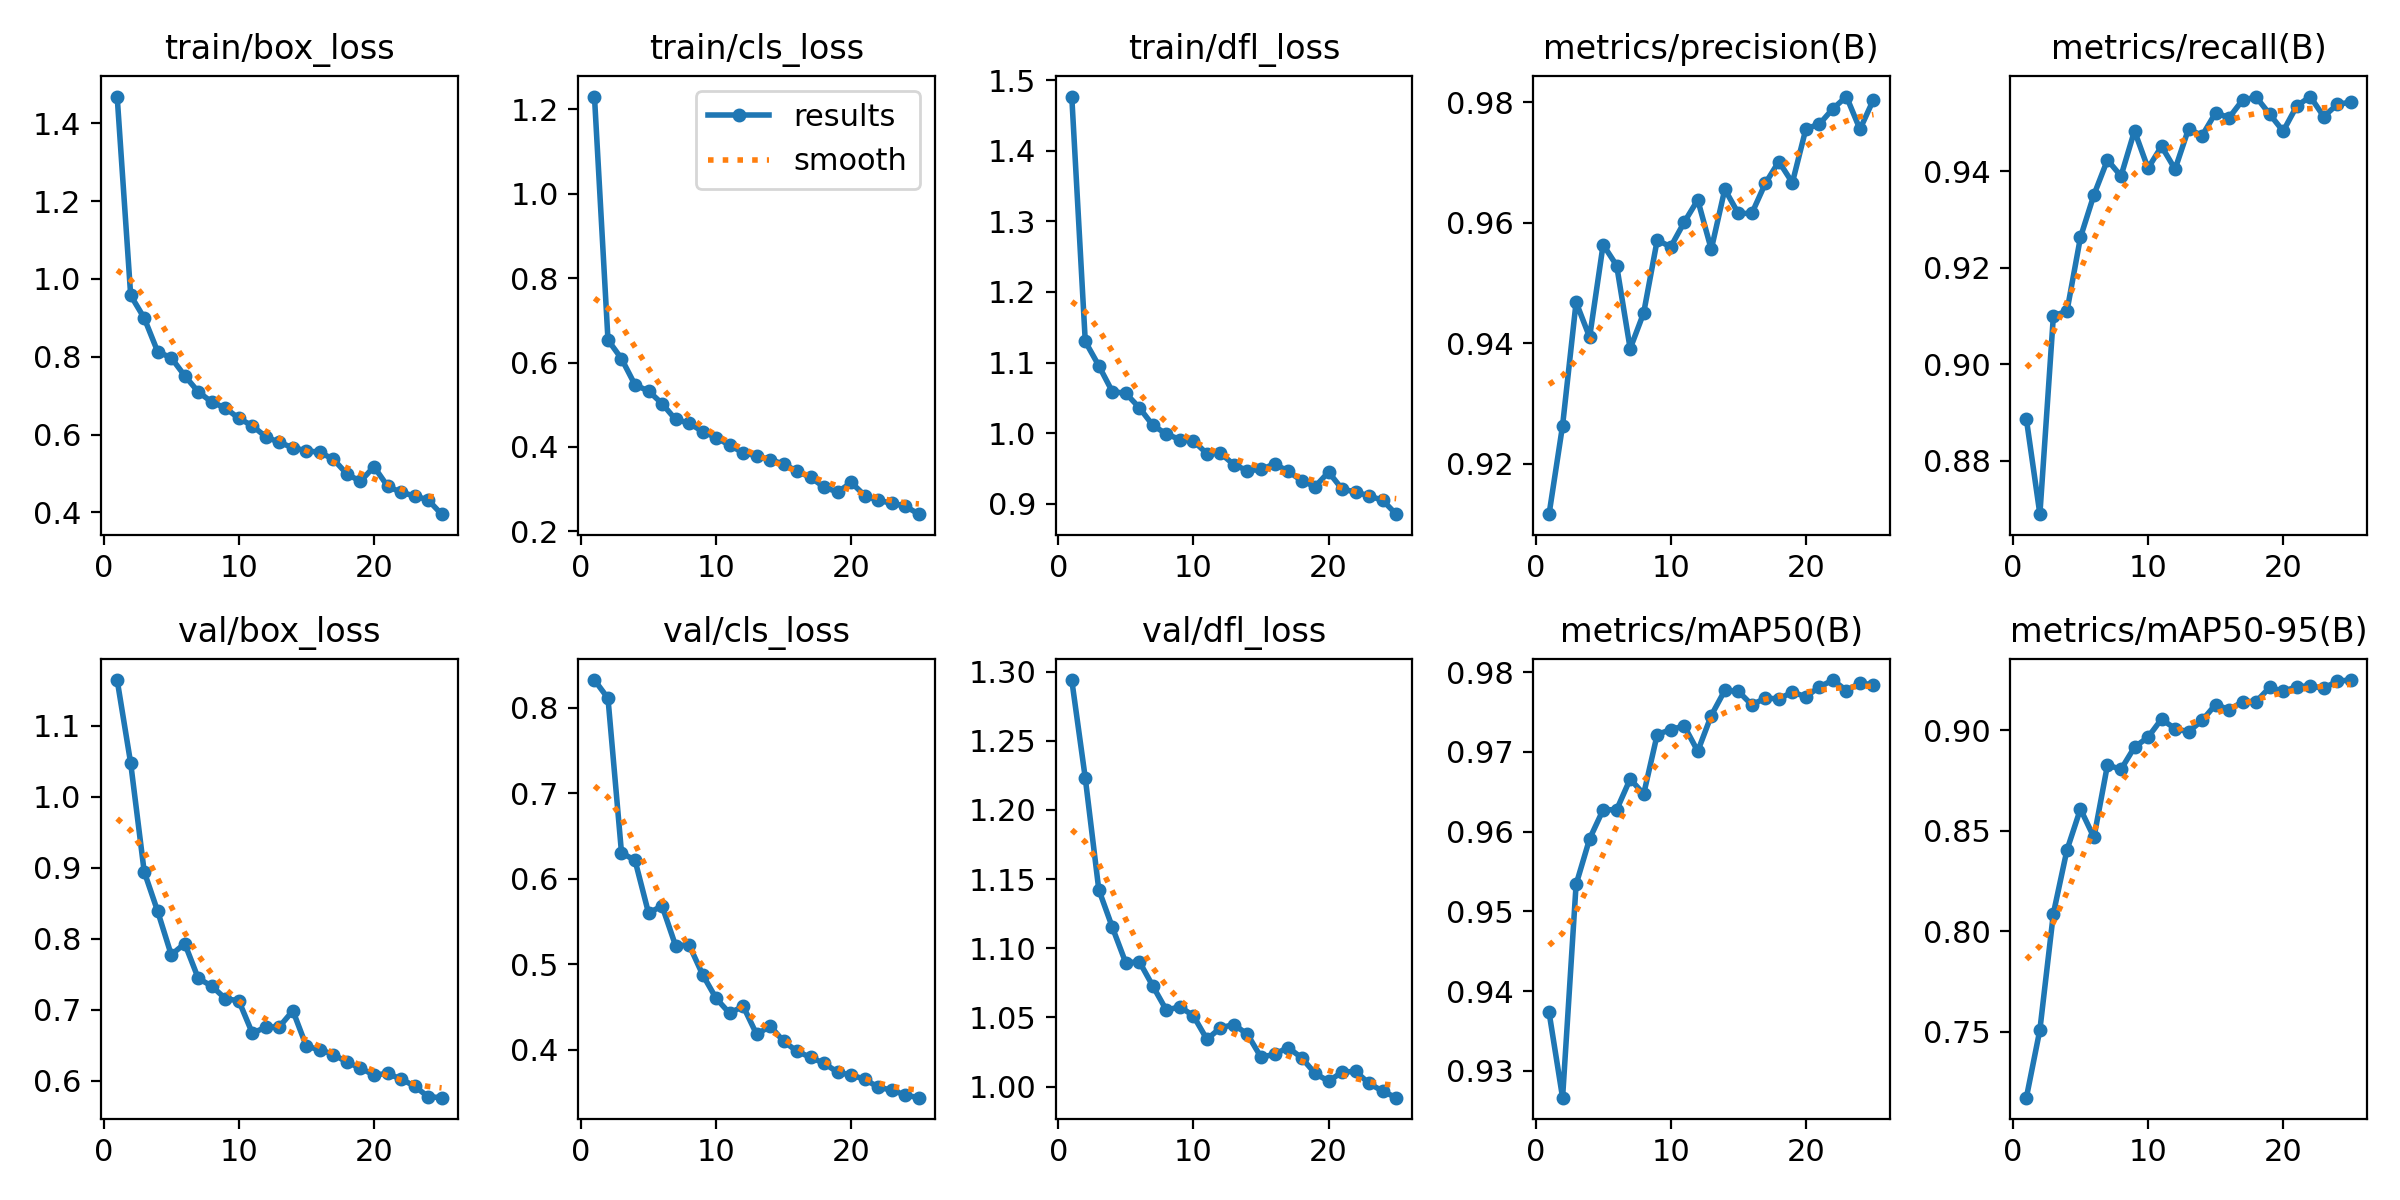

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/21 /content/datasets/Car-Space-Find-2/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.3ad16ed293cc641721b5f749b61f51f4.jpg: 800x800 15 emptys, 3 occupieds, 22.4ms
image 2/21 /content/datasets/Car-Space-Find-2/test/images/2022-11-15-14-11-26_mp4-37_jpg.rf.f1fa47b5f7ff059824c17d5674f08de2.jpg: 800x800 3 emptys, 4 occupieds, 22.5ms
image 3/21 /content/datasets/Car-Space-Find-2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-117_jpg.rf.c0d667d88dde2f5101086c38cd349dba.jpg: 800x800 15 emptys, 42 occupieds, 22.4ms
image 4/21 /content/datasets/Car-Space-Find-2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-137_jpg.rf.80d9f694f4ced027ed0efd85206e7e72.jpg: 800x800 15 emptys, 42 occupieds, 22.4ms
image 5/21 /conte

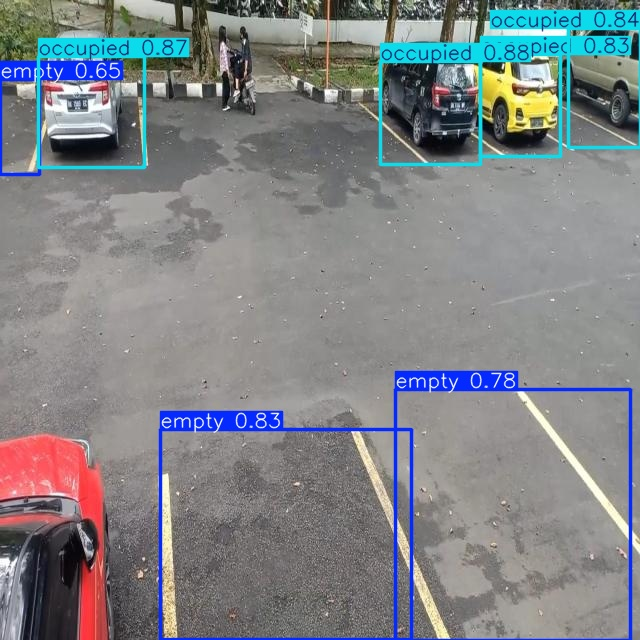

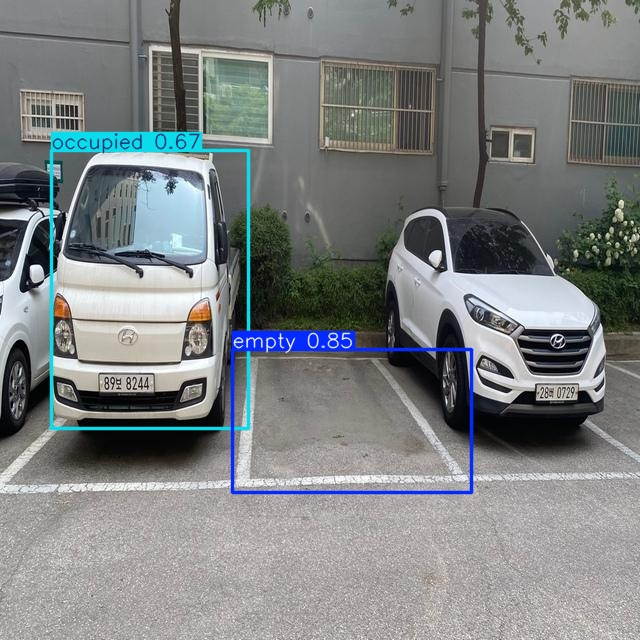

In [ ]:
predictions_path = f'{HOME}/runs/detect/predict'
for filename in os.listdir(predictions_path)[-2:]:
        display(Image(filename=f'{predictions_path}/{filename}'))
        print("\n")